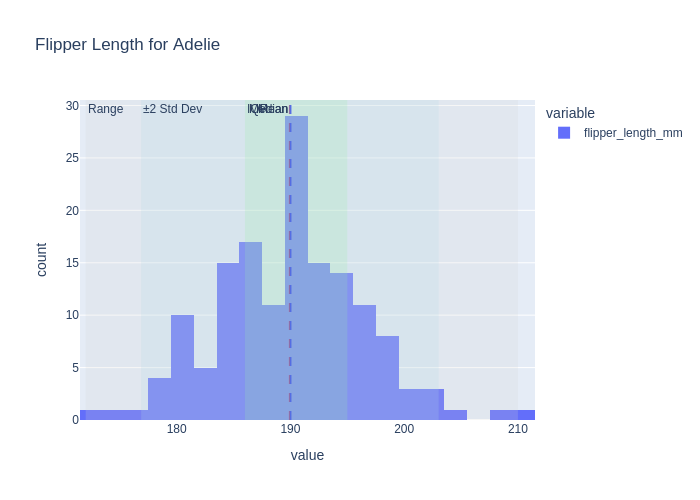

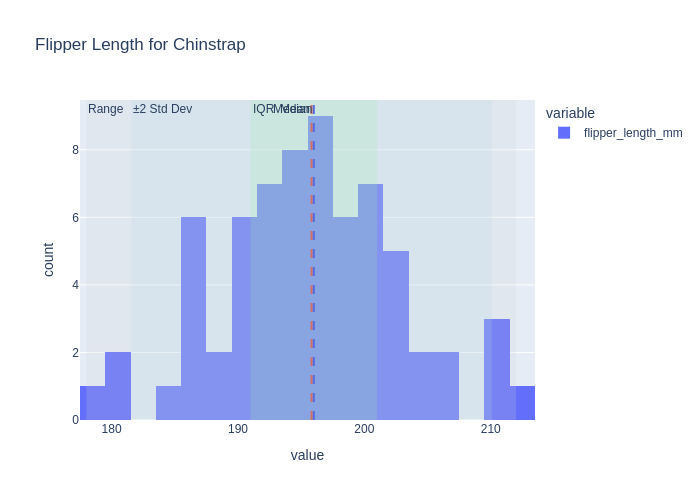

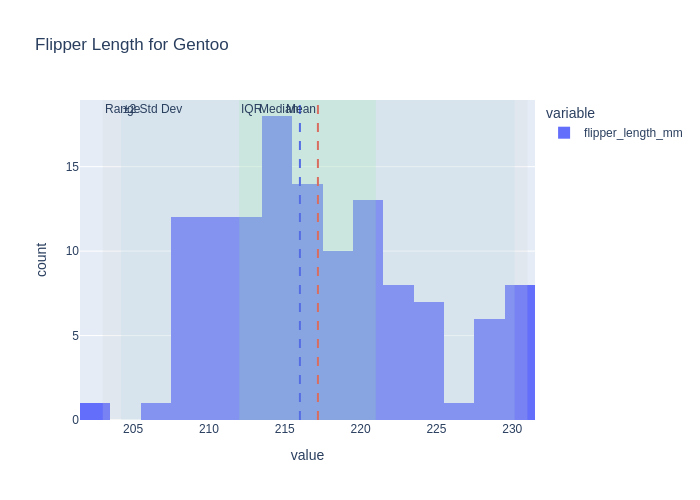

In [3]:
#Question 1

import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load the penguins dataset
penguins = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# Define function to calculate summary statistics and plot
def create_histogram_with_annotations(df, species_name):
    species_data = df[df['species'] == species_name]['flipper_length_mm'].dropna()

    # Calculate statistics
    mean = species_data.mean()
    median = species_data.median()
    min_val = species_data.min()
    max_val = species_data.max()
    q1 = species_data.quantile(0.25)
    q3 = species_data.quantile(0.75)
    iqr = q3 - q1
    std = species_data.std()

    # Create histogram
    fig = px.histogram(species_data, title=f'Flipper Length for {species_name}', nbins=20)

    # Add vertical lines for mean and median
    fig.add_vline(x=mean, line=dict(color='red', dash='dash'), annotation_text="Mean", annotation_position="top left")
    fig.add_vline(x=median, line=dict(color='blue', dash='dash'), annotation_text="Median", annotation_position="top left")

    # Add vertical rectangles for ranges
    # Range
    fig.add_vrect(x0=min_val, x1=max_val, line_width=0, fillcolor="lightgray", opacity=0.2, annotation_text="Range", annotation_position="top left")
    
    # Interquartile Range (IQR)
    fig.add_vrect(x0=q1, x1=q3, line_width=0, fillcolor="lightgreen", opacity=0.2, annotation_text="IQR", annotation_position="top left")

    # Two standard deviations from the mean
    fig.add_vrect(x0=mean - 2*std, x1=mean + 2*std, line_width=0, fillcolor="lightblue", opacity=0.2, annotation_text="±2 Std Dev", annotation_position="top left")

    # Show plot
    fig.show(renderer="png")

# Apply the function to each species
for species in penguins['species'].unique():
    create_histogram_with_annotations(penguins, species)

  #Chat Histories   https://chatgpt.com/share/66f39c02-5dd4-800f-b5e7-df2f4d462d1c


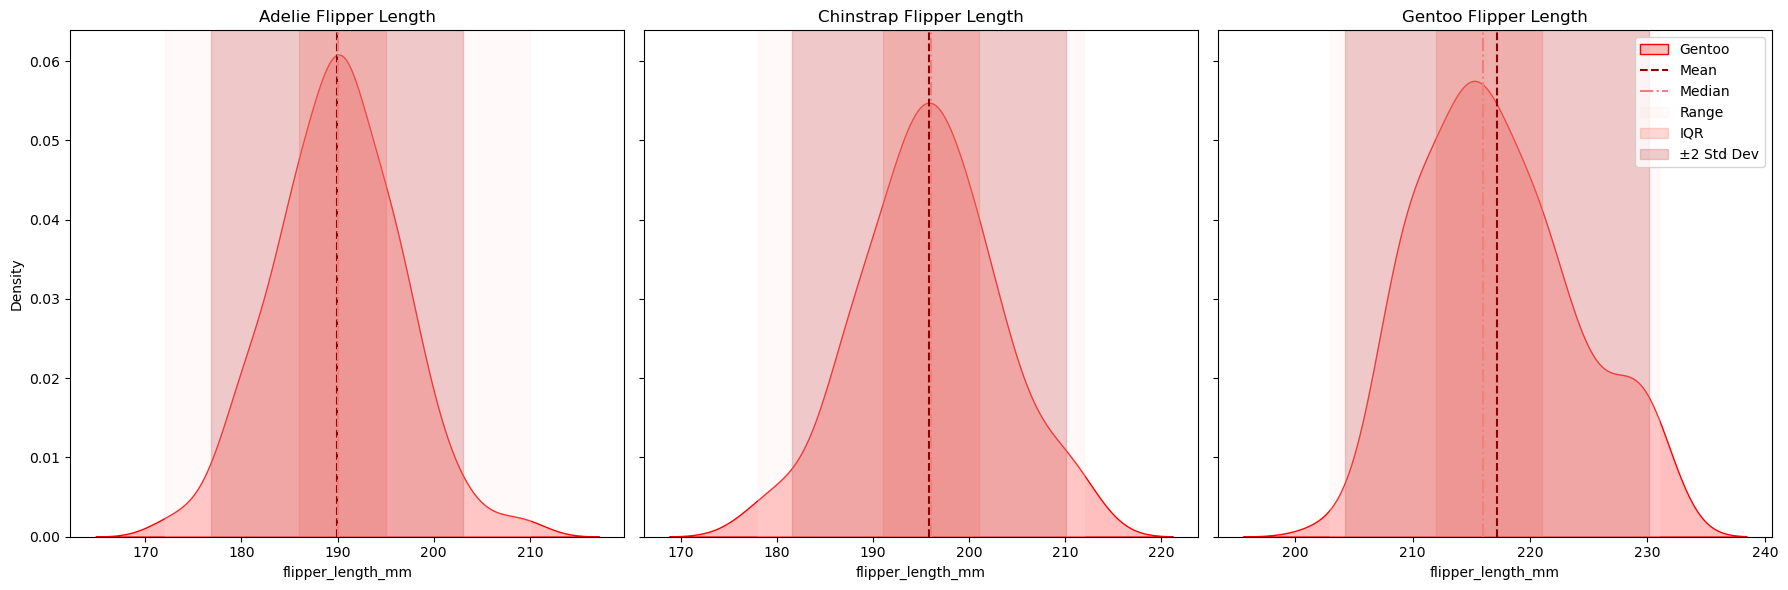

In [15]:
#Question 2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the penguins dataset
penguins = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# Define function to calculate summary statistics and plot
def plot_kde_with_annotations(ax, species_name, df):
    species_data = df[df['species'] == species_name]['flipper_length_mm'].dropna()

    # Calculate statistics
    mean = species_data.mean()
    median = species_data.median()
    min_val = species_data.min()
    max_val = species_data.max()
    q1 = species_data.quantile(0.25)
    q3 = species_data.quantile(0.75)
    std = species_data.std()

    # Create KDE plot with red color theme
    sns.kdeplot(species_data, ax=ax, fill=True, color='red', label=species_name)
    
    # Add vertical lines for mean and median with shades of red
    ax.axvline(mean, color='darkred', linestyle='--', label='Mean')
    ax.axvline(median, color='lightcoral', linestyle='-.', label='Median')
    
    # Add shaded areas for ranges with different red shades
    # Total Range
    ax.axvspan(min_val, max_val, alpha=0.2, color='mistyrose', label='Range')
    
    # Interquartile Range (IQR)
    ax.axvspan(q1, q3, alpha=0.3, color='salmon', label='IQR')
    
    # Two standard deviations from the mean
    ax.axvspan(mean - 2*std, mean + 2*std, alpha=0.3, color='indianred', label='±2 Std Dev')

    # Set title
    ax.set_title(f'{species_name} Flipper Length')

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot for each species
species_list = penguins['species'].dropna().unique()
for i, species in enumerate(species_list):
    plot_kde_with_annotations(axes[i], species, penguins)

# Add legend
plt.legend()
plt.tight_layout()
plt.show()


**Question 2**
Here I change the color of the figure into red in order to make it more clear to me.

Chat Histories(for Question 1-2)
https://chatgpt.com/share/66f39c02-5dd4-800f-b5e7-df2f4d462d1c

**Question 3.1**
Here is my opinion about the contrasting descriptions of these three "data distribution" visualization methods before chat with Chatbot.

First of all, for Box Plot: it shows the five main statistics of data distribution: minimum, first quartile (Q1), median (Q2), third quartile (Q3) and maximum value. However, Histogram shows the frequency distribution of data. It divides the data into some intervals, and the height of each interval represents the number or frequency of data points in the interval. Finally, there is Kernel Density Estimation. KDE smoothly estimates the probability density distribution of data by applying a kernel function to each data point. KDE can more intuitively show the density changes of data in different numerical intervals.


**Question 3.2**
Now I'm going to chat my opinion with Chatbot and see if Chatbot could give me "pros and cons" of them.

Here is Chat Histories
https://chatgpt.com/share/66f3a66f-5cb8-800f-9489-1f0135407337

**Question 3.3**
If it were me, I think I would be more inclined to choose box plots. Because it can clearly analyze the key statistics (minimum, Q1, median, Q3, maximum) in a single visualization. At the same time, it is also efficient in identifying outliers. In addition, they are non-parametric, which means that they do not assume any specific data distribution, so they are suitable for a variety of data types.

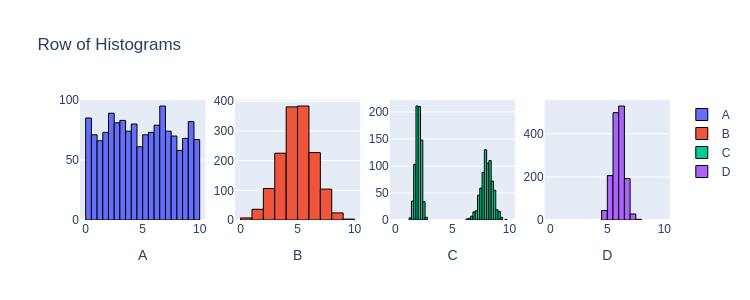

In [4]:
#Question 4.1 Run the code 
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

**Question 4.1**
Dataset-B and Dataset-D

**Question 4.2**
Dataset-B and Dataset-C

**Question 4.3**
Dataset-C and Dataset-D

**Question 4.4**
Dataset-A and Dataset-C

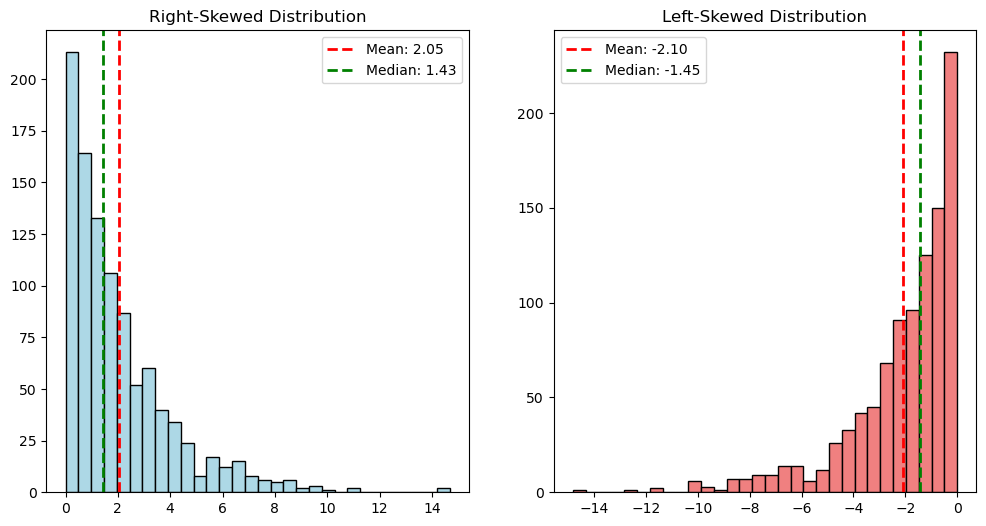

In [17]:
#Question 5.1 Using code to explore it
import numpy as np
import matplotlib.pyplot as plt

# Generate right-skewed (positively skewed) data
right_skewed = np.random.exponential(scale=2, size=1000)

# Generate left-skewed (negatively skewed) data
left_skewed = -np.random.exponential(scale=2, size=1000)

# Calculate mean and median
right_mean = np.mean(right_skewed)
right_median = np.median(right_skewed)
left_mean = np.mean(left_skewed)
left_median = np.median(left_skewed)

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Right-skewed distribution
axs[0].hist(right_skewed, bins=30, color='lightblue', edgecolor='black')
axs[0].axvline(right_mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {right_mean:.2f}')
axs[0].axvline(right_median, color='green', linestyle='dashed', linewidth=2, label=f'Median: {right_median:.2f}')
axs[0].set_title('Right-Skewed Distribution')
axs[0].legend()

# Left-skewed distribution
axs[1].hist(left_skewed, bins=30, color='lightcoral', edgecolor='black')
axs[1].axvline(left_mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {left_mean:.2f}')
axs[1].axvline(left_median, color='green', linestyle='dashed', linewidth=2, label=f'Median: {left_median:.2f}')
axs[1].set_title('Left-Skewed Distribution')
axs[1].legend()

plt.show()


**Question 5.2**
The following code does and how it works:

sample1 generates a right-skewed gamma distribution, displays it using a histogram, and calculates its mean and median.
sample2 generates a left-skewed gamma distribution, but no further operations are performed.
Through these operations, the code shows how to use the gamma distribution to simulate skewed data and visualize the distribution characteristics of the data.

**Question 5.3**
Explanation:

In a skewed distribution, the relationship between the mean and the median helps indicate the direction of the skew. When it is right-skewed, the mean is usually larger than the median because its extreme values ​​pull the mean higher, while the median, the middle value of the data, remains more stable. When it is left-skewed, the mean is usually smaller than the median. In this case, the extreme values ​​pull the mean lower, while the median remains relatively unchanged. The reason for this is that the mean is very sensitive to outliers and is affected by every value in the data set, but the median, as a location statistic, is not affected by these extreme values.

**Question 5**
Here is the Chat Histories for the whole Question 5:
https://chatgpt.com/share/66f3af3d-7084-800f-b9f0-626396453fe6

**Question 6**
I think the nutritional information analysis in this dataset is very interesting: the dataset includes many columns related to food nutrition, such as Calories, Total Fat, Saturated Fat, Cholesterol, Sodium, Carbs, Sugars, Protein, etc. This can analyze the nutritional composition of different foods and compare the health indicators between different foods. Most importantly, this can be linked to our daily life. For me, I need to control my body shape and maintain a balanced nutrition. I can use some information in this dataset to analyze my daily diet structure.

**Question 6**
To follow the group activity guide in the tut, I will start with how to understand this dataset. In order to clearly understand the dataset when working with group members, we need to start by exploring the dataset collectively, making sure everyone understands the meaning of each column and the overall structure. And we need to divide the work reasonably according to the strengths of each team member after everyone has a general understanding of the dataset. Share insights and code regularly through collaborative tools such as GitHub, and ensure that the documentation and comments in the code are consistent so that all team members can easily follow up.

**Question 6**
Here is the Chat Histories for Question 6:
https://chatgpt.com/share/66f3b3f2-bc38-800f-92fc-f9a3af0b6355

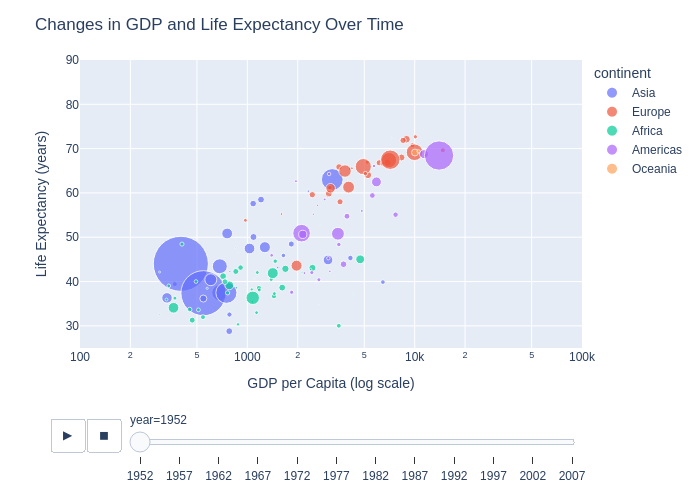

In [5]:
#Question 7
import plotly.express as px

# Load the built-in gapminder dataset
df = px.data.gapminder()

# Create an animated scatter plot (bubble chart)
fig = px.scatter(
    df, 
    x="gdpPercap", 
    y="lifeExp", 
    animation_frame="year", 
    animation_group="country", 
    size="pop", 
    color="continent", 
    hover_name="country", 
    log_x=True, 
    size_max=60, 
    range_x=[100,100000], 
    range_y=[25,90]
)

# Update layout for better presentation
fig.update_layout(
    title="Changes in GDP and Life Expectancy Over Time",
    xaxis_title="GDP per Capita (log scale)",
    yaxis_title="Life Expectancy (years)",
)

# Show the figure
fig.show(renderer="png")


**Question 7**
Here I interac with Chatbot then make an animated bubble chart using the plotly library in Python, based on
the gapminder dataset that comes with plotly, which contains data on countries' GDP, life expectancy, and population over time.
Here is my Chat Histories:
https://chatgpt.com/share/66f3b60b-6128-800f-bd99-85a8439149a3

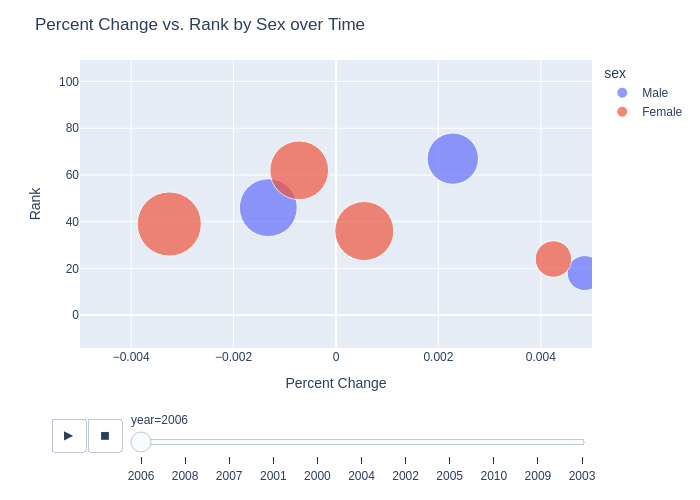

In [6]:
#Question 8 The Second Version Base On The Previous Answer
import pandas as pd
import plotly.express as px
import numpy as np

# Create a sample dataset
np.random.seed(42)
years = list(range(2000, 2011))
names = ['Alice', 'Bob', 'Charlie', 'David', 'Eve']
sexes = ['Male', 'Female']

data = {
    'name': np.random.choice(names, 100),
    'year': np.random.choice(years, 100),
    'percent change': np.random.uniform(-0.005, 0.005, 100),
    'rank': np.random.randint(1, 100, 100),
    'percent': np.random.uniform(0, 1, 100),
    'sex': np.random.choice(sexes, 100)
}

df = pd.DataFrame(data)

# Create the updated scatter plot
fig = px.scatter(
    df, 
    x="percent change",  # Change to the column for percent change
    y="rank",            # Change to the column for rank
    animation_frame="year", 
    animation_group="name", 
    size="percent",       # Change to the column for percent
    color="sex",          # Change to the column for sex
    hover_name="name",    # Change to the column for name
    size_max=50,          # Limit bubble size
    range_x=[-0.005, 0.005]  # Set the x-axis range to match the percent change
)

# Update the layout
fig.update_layout(
    title="Percent Change vs. Rank by Sex over Time",
    xaxis_title="Percent Change",
    yaxis_title="Rank"
)

# Display the updated figure
fig.show(renderer="png")


**Question 8**
Chat Histories(For 7-8) https://chatgpt.com/share/66f3b60b-6128-800f-bd99-85a8439149a3

**Question 9**
Yes, I have reviewed the course wiki-textbook and interacted with a ChatBot to help me understand all the material in the tutorial and lecture that I didn't quite follow when I first saw it.
